In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import seaborn as sns
from process_data_for_knn import process_dataset_for_knn
from utils import  is_array_col


In [2]:
sns.set_style('darkgrid')

In [9]:
dataset_path_processed = Path(r'processed_data/data_coarse1__10000_1000000.0.csv')
dataset_path_raw = Path(r'processed_data/data_coarse1__10000_1000000.0.csv')
df_raw = pd.read_csv(dataset_path_raw)
df_processed = pd.read_csv(dataset_path_processed)
df_knn, exclude, scaler, array_columns, array_lengths  =  process_dataset_for_knn(dataset_path_processed,divide_distributions=True)


FileNotFoundError: [Errno 2] No such file or directory: &#39;C:\\Users\\samme\\Google_Drive\\Code_library\\MIR_Pipeline_Project\\processed_data\\data__10000_1000000.0.csv&#39;

In [10]:

def make_hists(feature_name,df_raw,df_processed):
#Take out large outliers for better visualization
    df_raw = df_raw[(df_raw[feature_name]<=df_raw[feature_name].quantile(0.99))]
    df_raw = df_raw[(df_raw[feature_name]>=df_raw[feature_name].quantile(0.009))]
    df_processed = df_processed[(df_processed[feature_name]<=df_processed[feature_name].quantile(0.99))]
    df_processed = df_processed[(df_processed[feature_name]>=df_processed[feature_name].quantile(0.009))]
    print(f"Min max before:{df_raw[feature_name].min()},{df_raw[feature_name].max()}")
    print(f"Min max after:{df_processed[feature_name].min()},{df_processed[feature_name].max()}")
    

    for df,title in zip([df_raw,df_processed],['For non preprocessed shapes','For preprocessed shapes']):
        plt.hist(df[feature_name])
        plt.xlabel(feature_name)
        plt.ylabel('Shape count')
        plt.title(title)
        #plt.savefig(r'C:\Users\samme\Google_Drive\Code_library\MIR_Pipeline_Project\graphs/hist_before.png',dpi=600)
        plt.show()

In [5]:
make_hists('n_triangles',df_raw,df_processed)

NameError: name &#39;df_raw&#39; is not defined

In [6]:
make_hists('volume',df_raw,df_processed)

NameError: name &#39;df_raw&#39; is not defined

In [7]:
make_hists('surface_area',df_raw,df_processed)

NameError: name &#39;df_raw&#39; is not defined

In [8]:
make_hists('eccentricity',df_raw,df_processed)

NameError: name &#39;df_raw&#39; is not defined

In [ ]:
make_hists('bounding_box_ratio',df_raw,df_processed)

In [108]:
def plot_distributions(array_name,df_knn,array_columns,n_classes=5,specific_list=False):
    relevant_cols = [x for x in df_knn.columns if is_array_col(array_columns,x)==array_name ]

 
    classes = list(df_knn['classification'].value_counts().items())[0:n_classes]
    if specific_list:
        n_classes=len(specific_list)
        classes = list(df_knn['classification'][df_knn['classification'].isin(specific_list)].value_counts().items())
        print(classes)

    print(n_classes)
    fig, ax = plt.subplots(n_classes,constrained_layout=True)
    fig.set_size_inches(9,10)
    fig.set_dpi(150)
    current_x=0
    for class_name, occurences in classes:
        
        
        df = df_knn[df_knn['classification']==class_name]
        current_axes = ax[current_x]
        plt.sca(current_axes)
        for index, row in df.iterrows():
            y= row[relevant_cols].values
            x= range(0,len(y))
            plt.plot(x,y)
            plt.xticks(range(0,len(x)))
        #plt.xlabel('Bins')
        plt.ylabel(class_name)
     
        current_x+=1
    fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.95])
    fig.suptitle(f'Binned distribution of {array_name}',fontsize=16)
    plt.figtext(y=0,x=0.5,s="Bins",ha='center')

    plt.savefig(fr"C:\Users\samme\Google_Drive\Code_library\MIR_Pipeline_Project\graphs\{array_name}",dpi=150)
    
    plt.show()
    return fig

        

        
        


In [85]:
print(array_columns)

['bounding_box', 'angle_three_vertices', 'barycenter_vertice', 'two_vertices', 'square_area_triangle', 'cube_volume_tetrahedron']


In [101]:
list(df_knn['classification'].value_counts().items())[0:10]

[('human', 100),
 ('fighter_jet', 100),
 ('potted_plant', 51),
 ('rectangular', 46),
 ('human_arms_out', 41),
 ('helicopter', 35),
 ('face', 33),
 ('head', 31),
 ('sword', 29),
 ('biplane', 28)]

[('human', 100), ('fighter_jet', 100), ('potted_plant', 51), ('rectangular', 46), ('helicopter', 35), ('face', 33), ('sword', 29)]
7


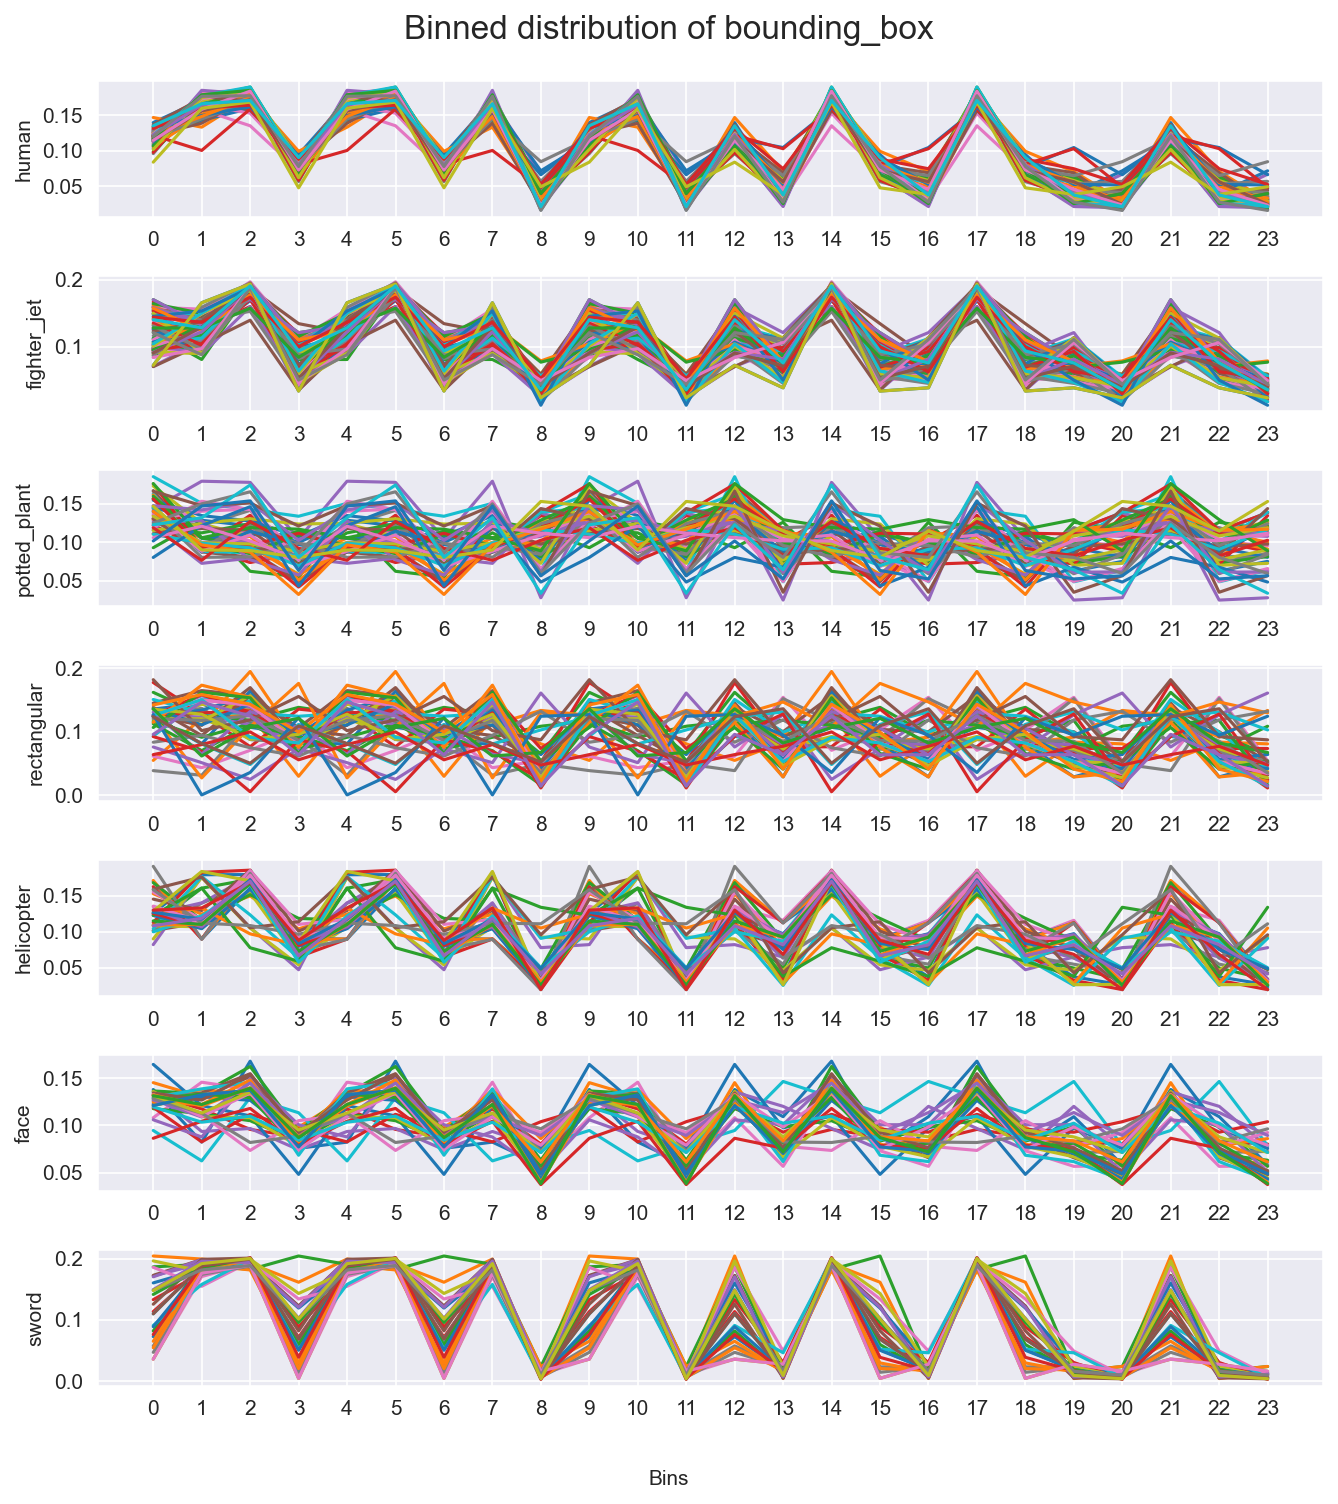

[('human', 100), ('fighter_jet', 100), ('potted_plant', 51), ('rectangular', 46), ('helicopter', 35), ('face', 33), ('sword', 29)]
7


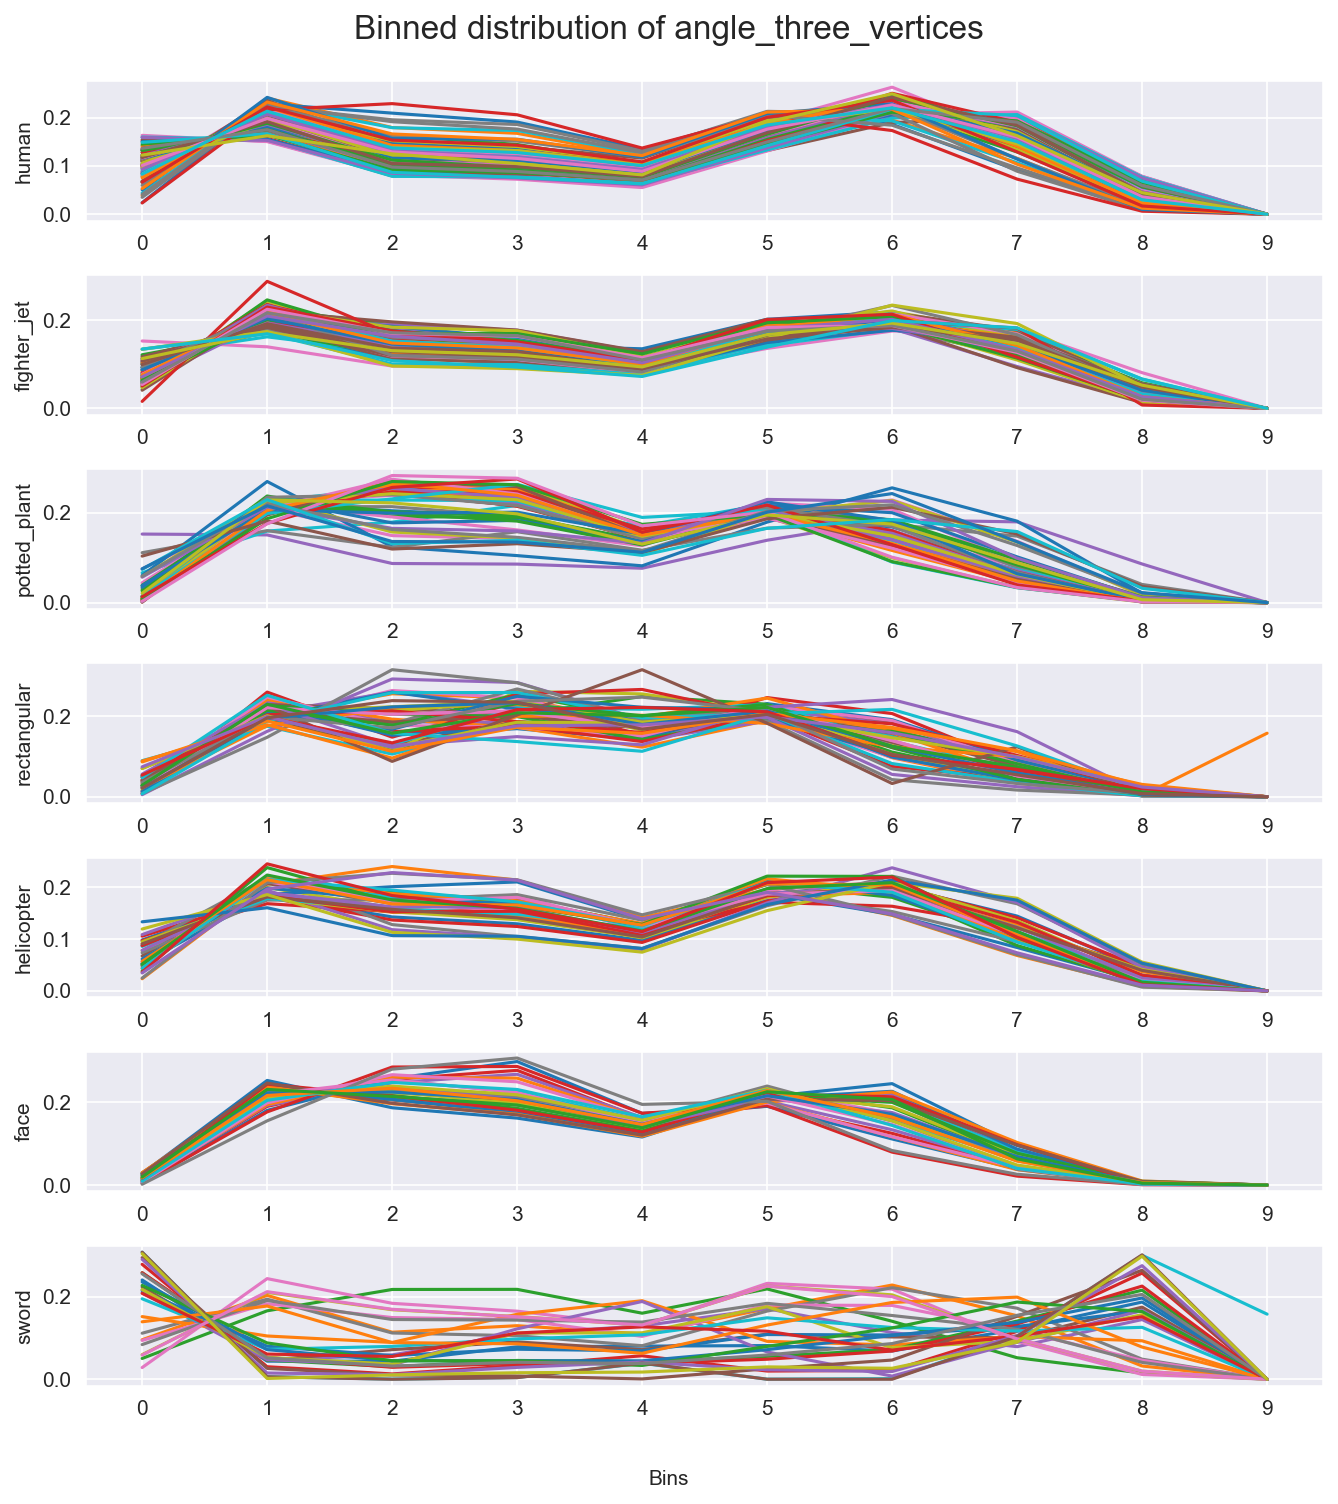

[('human', 100), ('fighter_jet', 100), ('potted_plant', 51), ('rectangular', 46), ('helicopter', 35), ('face', 33), ('sword', 29)]
7


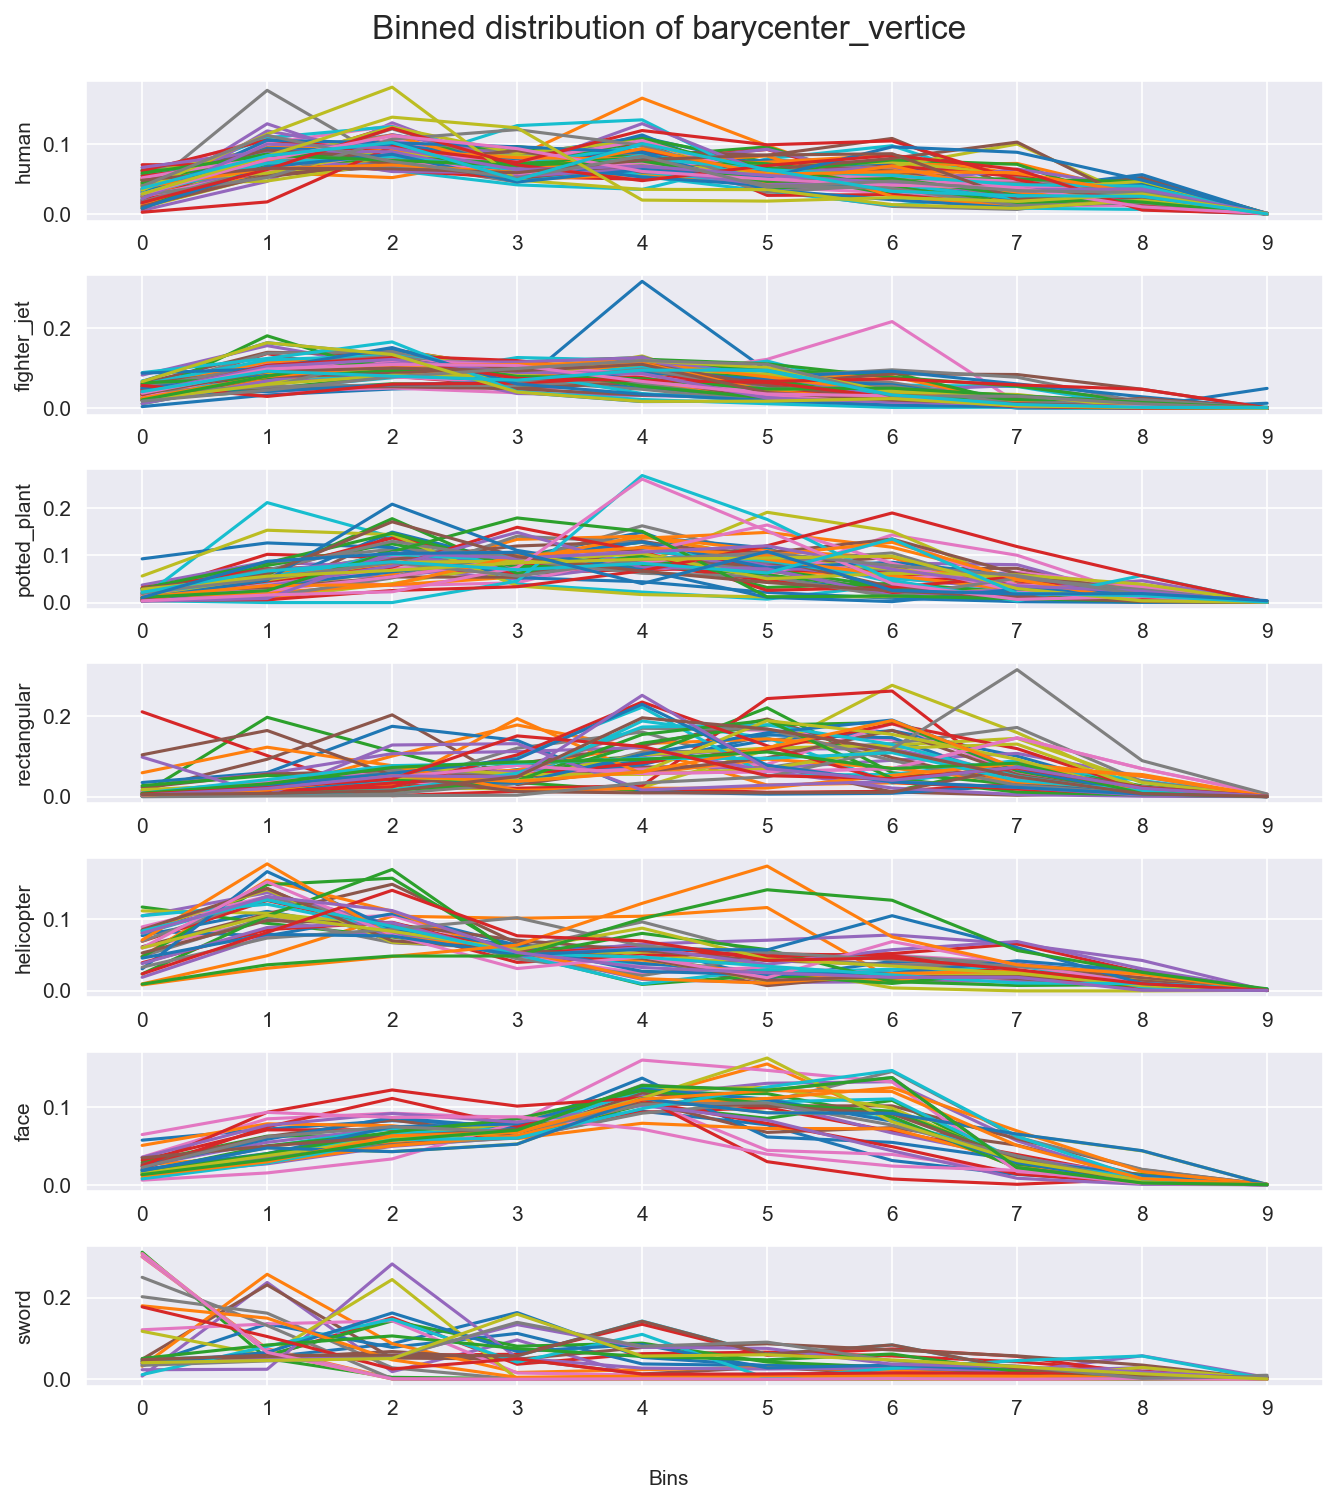

[('human', 100), ('fighter_jet', 100), ('potted_plant', 51), ('rectangular', 46), ('helicopter', 35), ('face', 33), ('sword', 29)]
7


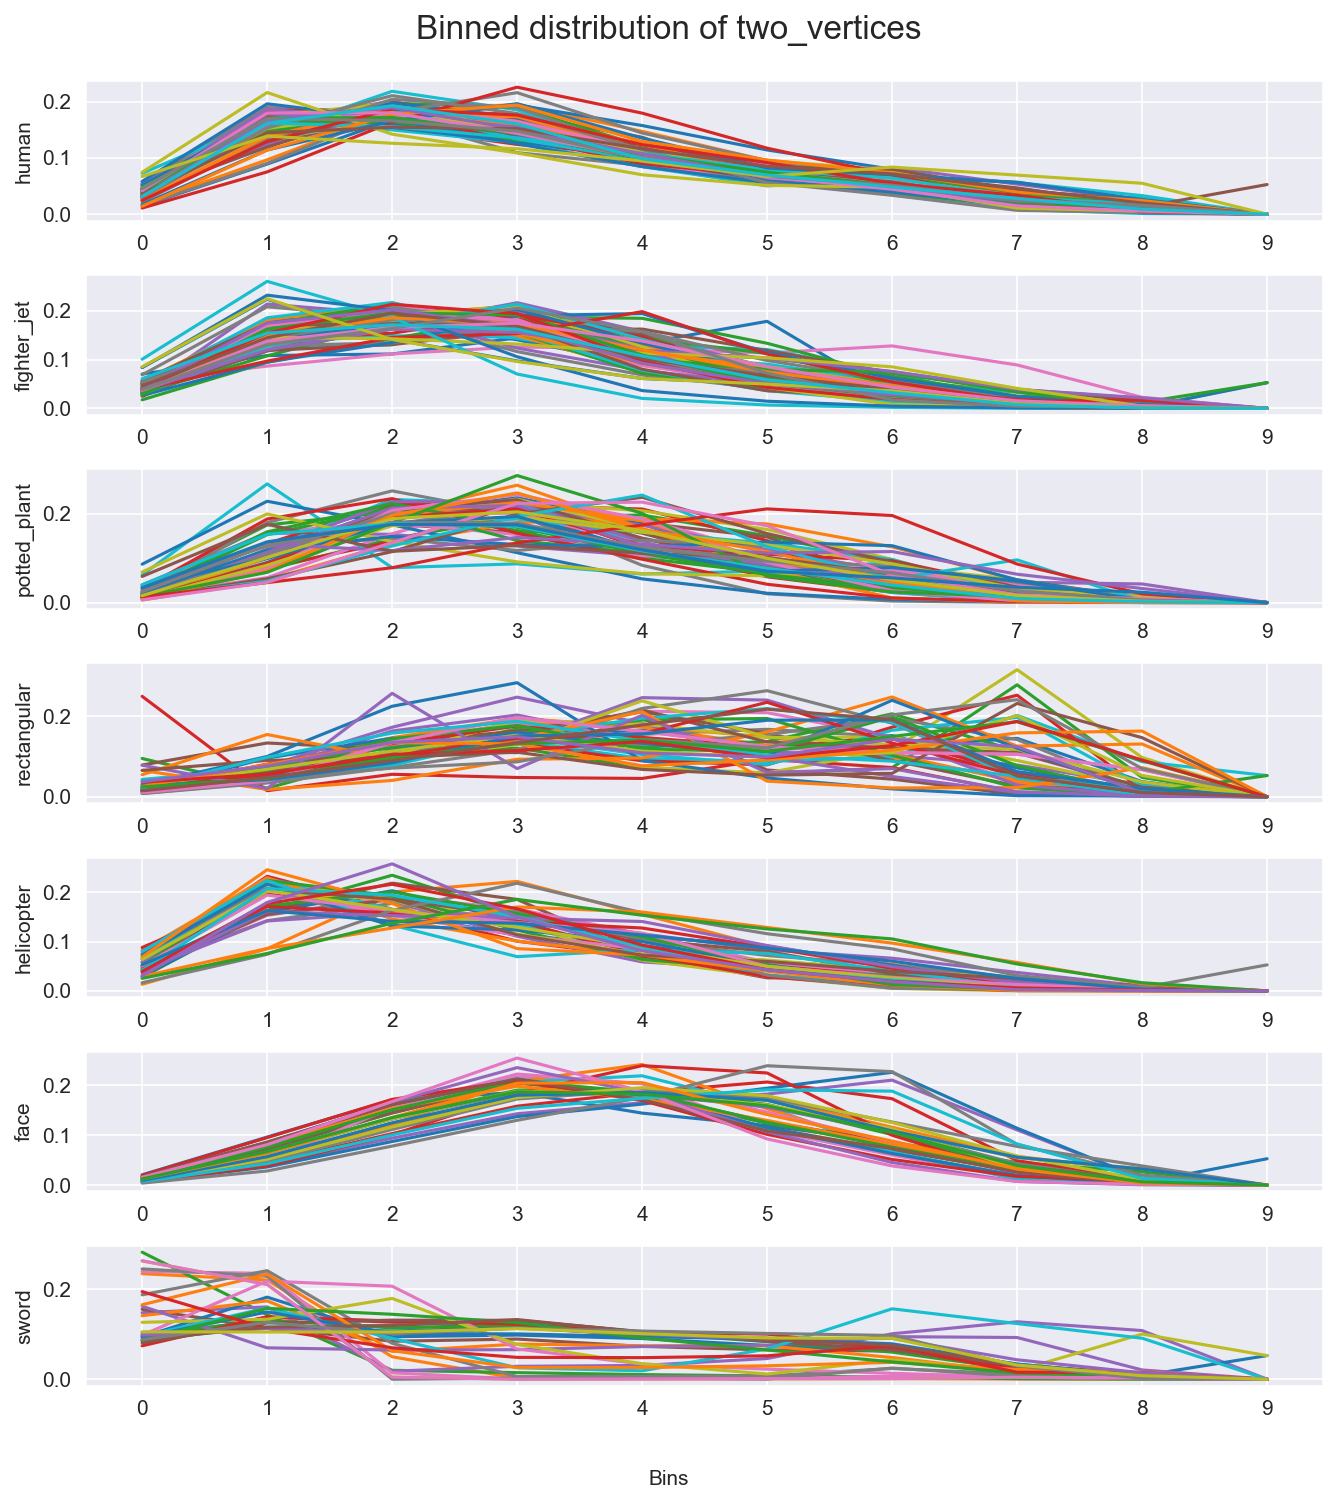

[('human', 100), ('fighter_jet', 100), ('potted_plant', 51), ('rectangular', 46), ('helicopter', 35), ('face', 33), ('sword', 29)]
7


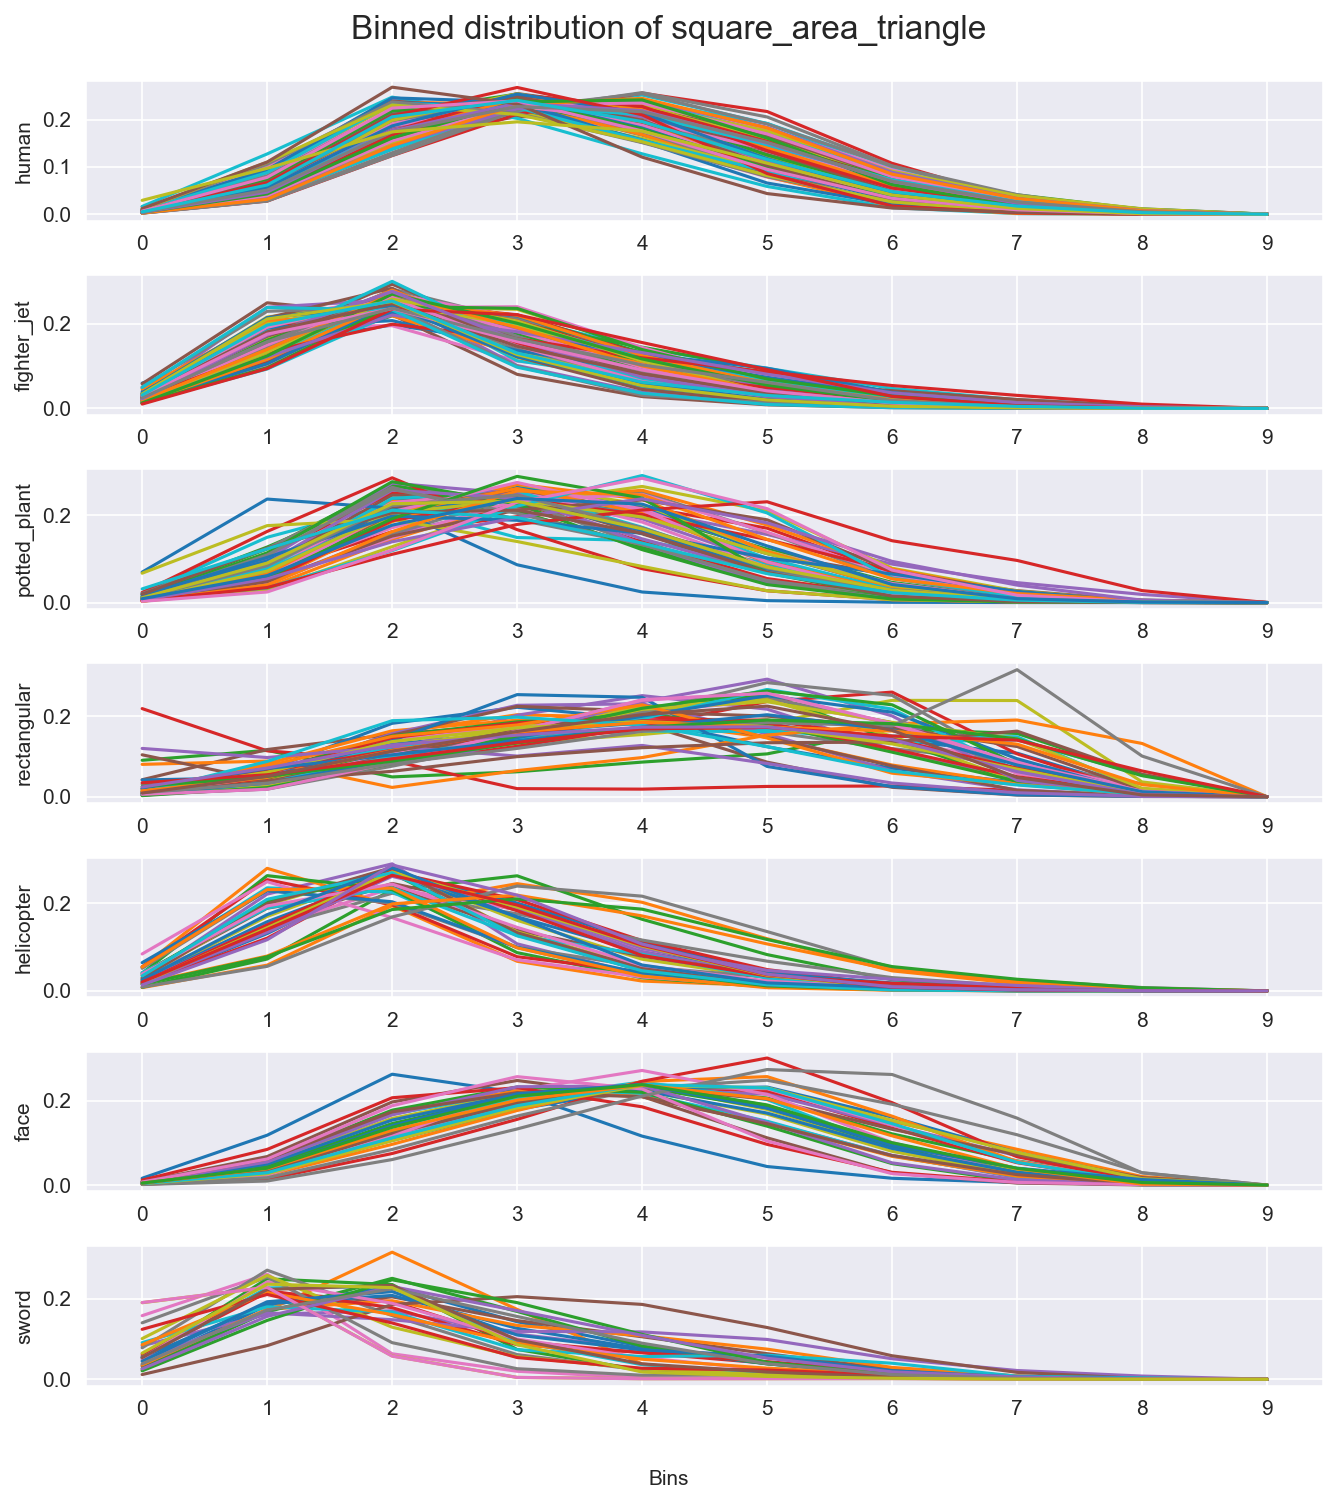

[('human', 100), ('fighter_jet', 100), ('potted_plant', 51), ('rectangular', 46), ('helicopter', 35), ('face', 33), ('sword', 29)]
7


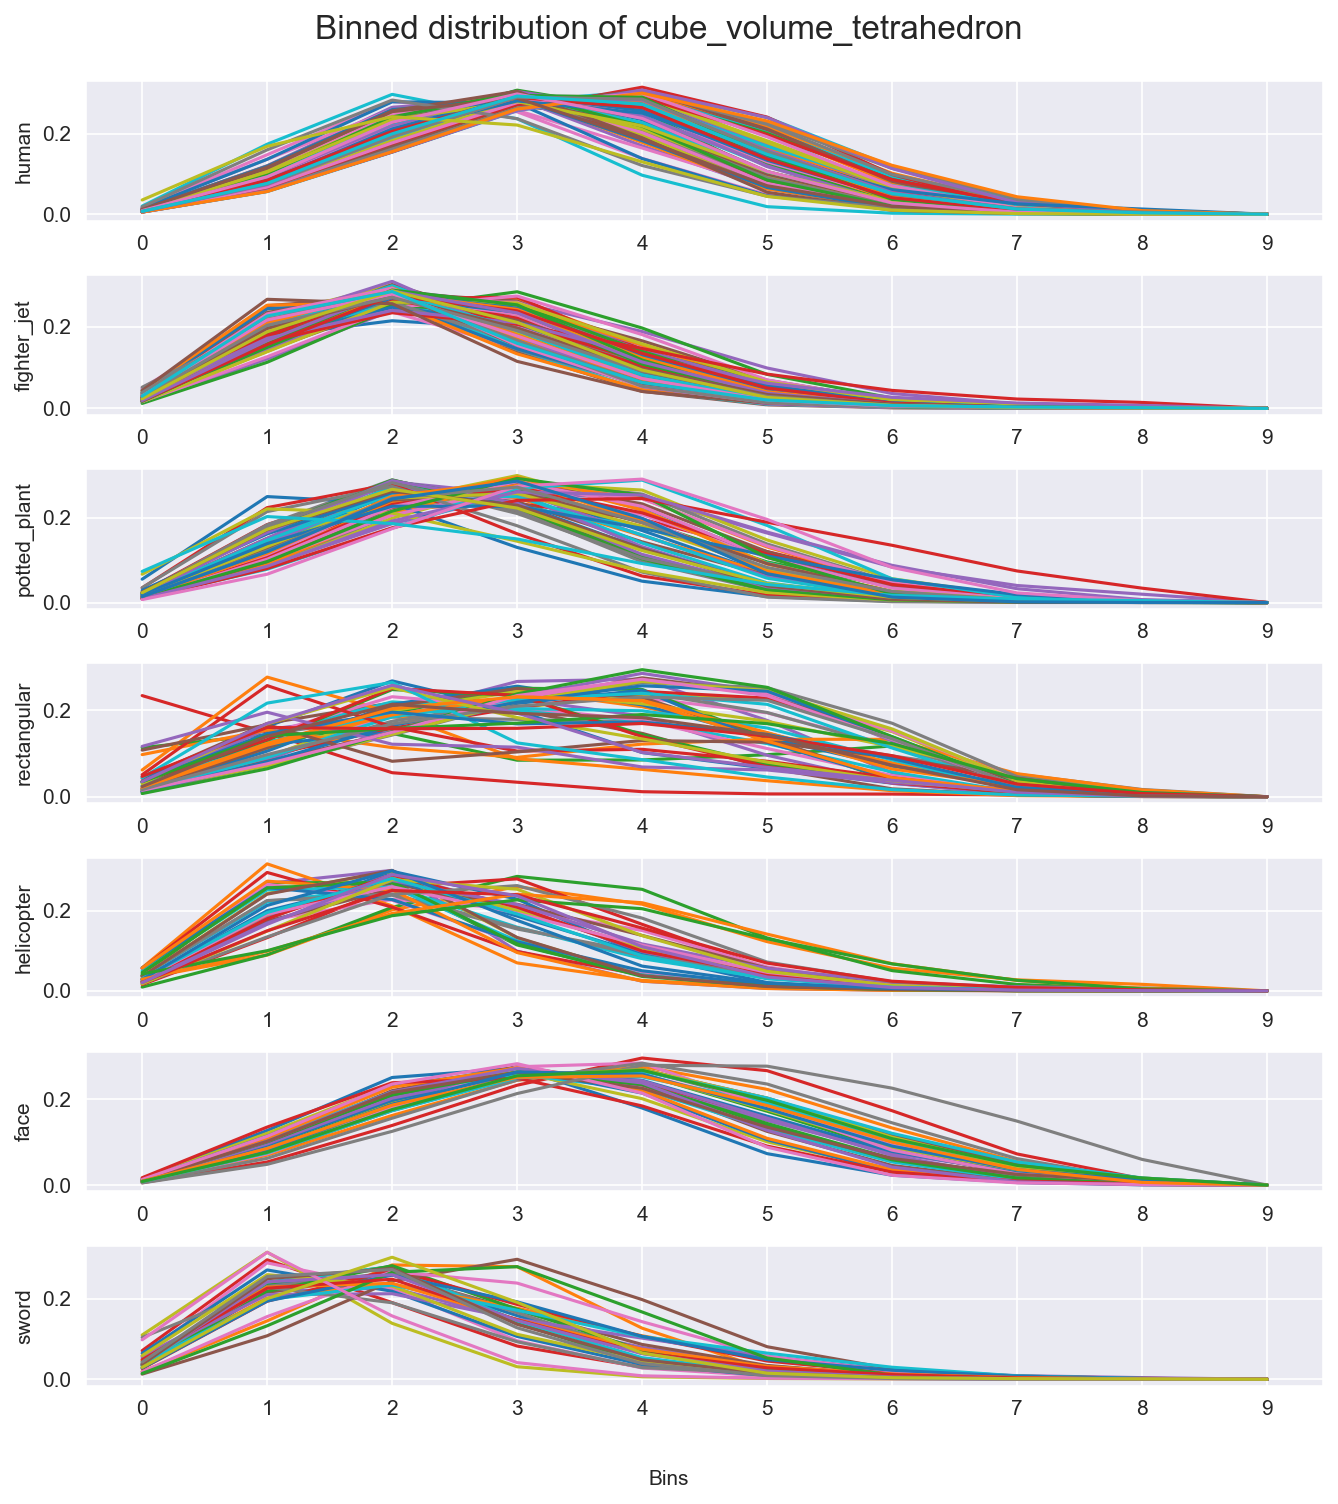

In [109]:
specific_list = ['human','face','sword','potted_plant','fighter_jet','helicopter','rectangular']

for array_name in array_columns:
    fig = plot_distributions(array_name,df_knn,array_columns,n_classes=10,specific_list=specific_list)
    



